In [1]:
import pandas as pd
import numpy as np


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# data volidation
data.info()

In [ ]:
data.shape

In [ ]:
# Missing value calculation
data.shape[0]


In [ ]:
# Missing value calculation
data.shape[0]- data.count()

In [ ]:
data.isna().sum()

In [ ]:
# typo erros
data.columns

In [ ]:
update_col=['srno', 'tv', 'radio', 'newspaper', 'sales']
update_col

In [ ]:
data.columns=update_col

In [ ]:
data.head()

In [ ]:
# BOX PLOT

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.figure(figsize=(8,8))
data.plot(kind="box")
plt.ylabel("Values")
plt.tight_layout()
plt.title(f"Box plot of Dataset")
plt.grid()
plt.show()

In [ ]:
number = 50
print(number)

In [ ]:
print("number",number)

In [ ]:
print(f"number is {number} my lucky  number is {number}")

In [ ]:
# remove outliers
data["newspaper"]

In [ ]:
data["newspaper"]

In [ ]:
upper_accepatble_value=data["newspaper"].quantile(0.99)
print(f"upper_accepatble_value {upper_accepatble_value}")
data[data["newspaper"]>upper_accepatble_value]

In [ ]:
md=data["newspaper"].median()
print(f"median value of newspaper is {md}")
data.loc[data["newspaper"]>upper_accepatble_value]=md

In [ ]:
data[data["newspaper"]>upper_accepatble_value]

In [ ]:
plt.figure(figsize=(8,8))
data["newspaper"].plot(kind="box")
plt.ylabel("Values")
plt.tight_layout()
plt.title(f"Box plot of newspaper")
plt.grid()
plt.show()

In [ ]:
Meet_corr=data.corr()
Meet_corr

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(Meet_corr,annot=True)
plt.tight_layout()
plt.title(f"Heat Map Graph")
plt.grid()
plt.show()

In [ ]:
data.head()

In [ ]:
x=data.drop(["srno","sales"],axis=1)
x

In [ ]:
y=data["sales"]
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,shuffle=True)
print(f"x training {x_train.shape}")
print(f"y training {y_train.shape}")
print(f"x testing {x_test.shape}")
print(f"y testing {y_test.shape}")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
select_model=[LinearRegression(),
              DecisionTreeRegressor(max_depth=4,min_samples_split=30,min_samples_leaf=3),
              RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)]

In [ ]:
my_rmse=[]
my_r_square=[]
for model in select_model:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model{model}")
    

In [ ]:
result=[my_rmse,my_r_square]
result

In [ ]:
pd.DataFrame(data=result,columns=["LR","DTC","RF"],index=["rmse","R Square"])

In [ ]:
rf= RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)
rf

In [ ]:
param_grid = {
    'n_estimators' : [100,250,300,350], # number of tree in the forest
    'max_depth' : [None,10,20,30], # Max(mum depth of be tree
    'min_samples_split' : [2,5,10], # Minimum number of sample requires to split an internal node
    'min_samples_leaf' : [1,2,4], # Minimum number of samples requires to be at a leaf node
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
# n_jobs = -1 for faster computation / parallizations

#fit the model with differen hyper parameters combinations
grid_search.fit(x_train,y_train)

#get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [ ]:
best_params

# Random hyper Parameters
 1.DecisionTreeRegressor(max_depth=4,min_samples_split=30,min_samples_leaf=3),
 2.RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)]

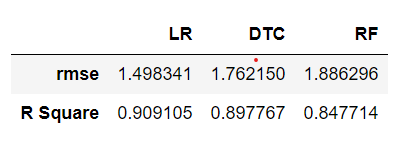


# Grid Search Hyper Parametrs
1.DecisionTreeRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=5), 
2.RandomForestRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=5,n_estimators=100)

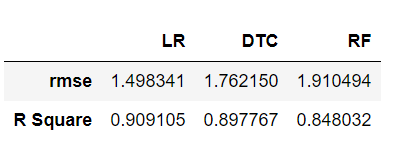